In [1]:

import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.utils.multiclass import unique_labels

import joblib

def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()


In [2]:

DATA_PATH = "audio_data"

LABELS = {
    "good": 0,
    "needs_tuning": 1,
    "needs_maintenance": 2
}

label_names = list(LABELS.keys())

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_mean = np.mean(mfccs.T, axis=0)
    return mfccs_mean

def load_dataset(data_path):
    X = []
    y = []
    for label_name, label_val in LABELS.items():
        folder = os.path.join(data_path, label_name)
        print(f"Looking for files in: {folder}")  # Debug line
        if not os.path.exists(folder):
            print(f"Folder not found: {folder}")
            continue
        for file in os.listdir(folder):
            if file.endswith(".wav"):
                file_path = os.path.join(folder, file)
                features = extract_features(file_path)
                X.append(features)
                y.append(label_val)
    return np.array(X), np.array(y)



In [3]:

print("Loading data...")
X, y = load_dataset(DATA_PATH)
print("Total Samples:", len(X))


Loading data...
Looking for files in: audio_data\good


C:\Users\Shrikrishna R\miniconda3\envs\Project_Mri\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1025
  warnings.warn(


Looking for files in: audio_data\needs_tuning
Looking for files in: audio_data\needs_maintenance
Total Samples: 722


In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:

svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train, y_train)


SVC(C=10)

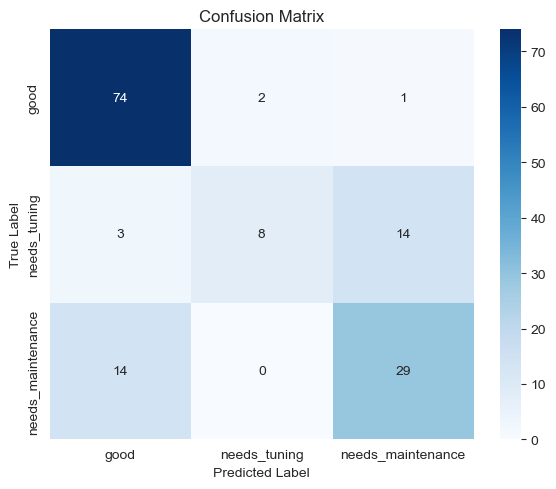

Accuracy: 0.77
Precision: 0.76
Recall: 0.65

Classification Report:
                    precision    recall  f1-score   support

             good       0.81      0.96      0.88        77
     needs_tuning       0.80      0.32      0.46        25
needs_maintenance       0.66      0.67      0.67        43

         accuracy                           0.77       145
        macro avg       0.76      0.65      0.67       145
     weighted avg       0.77      0.77      0.74       145



In [6]:
# Train the SVM model
from sklearn.svm import SVC

model = SVC(kernel='linear')  # You can change to 'rbf' or 'poly' if needed
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, label_names)

# Accuracy, Precision, Recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Classification report with FIX
from sklearn.utils.multiclass import unique_labels
used_labels = unique_labels(y_test, y_pred)
used_label_names = [label_names[i] for i in used_labels]

print("\nClassification Report:\n", classification_report(
    y_test, y_pred,
    labels=used_labels,
    target_names=used_label_names,
    zero_division=0
))


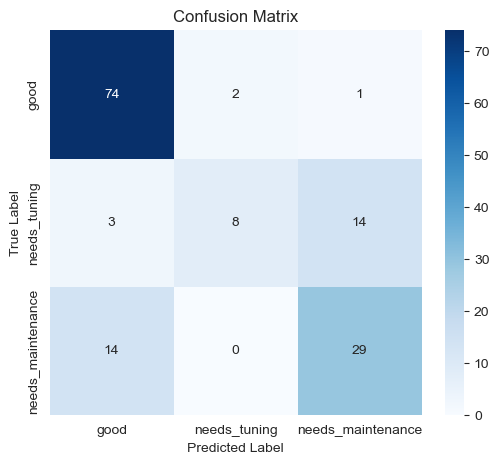

In [7]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
